
<h3><font size="6">Applied Data Science Final Project </font>
<p><b><font size="3">by Rene Disotuar</font> <br /> </p>


<p> For this final project I wanted to look at the growth of the population in America, and see if the data 
would coincide with the suggestion that the earth population has been growing radpidly through out the years.<br />
I started by importing the gapminder data and getting familiar with the data to have an understading of what would be needed 
to create an analysis, and answer whether or not the population of America has been growing rapidly.
more than so over the past decades </p>

<p>One of the first things noted was that the population column contained null values for some of the years 
and that needed to be correced before I could continue

In [ ]:
import pandas as pd

In [2]:
gpmind = pd.read_csv('gapminder.csv')

In [26]:
def setNonNA(mydata):
    i=0
    while i < 41283: 
        if(pd.isnull(mydata.iloc[i,3]))==True:
            mydata.iloc[i,3] = mydata.iloc[i-1,3]
        elif (pd.isnull(mydata.iloc[i,3]))==False: 
            mydata.iloc[i,3] = mydata.iloc[i,3]          
        i = i + 1
    #print(mydata)
    return mydata

In [30]:
gpmind.population.isnull().values.any()

False

In [ ]:
gpmind.info()

<p>Once the problem was fixed, understanding the data was the next step. Another problem came noticing 
that the population column was not a number and needed to be corrected before I continued. With the data in 
the proper format, selecting the specific population that I wanted to look at was the next step. The Gapminder Data has
the population for all the contries and I wanted to find out about the American region specifically, a little more data wrangling was needed to only use the data for the American Region <br />
<p>

In [41]:
gpmind['population'] = gpmind.population.str.replace(',', '').astype(float)

In [43]:
gpmindAmerica = gpmind[gpmind['region']=="America"]

In [ ]:
gpmindAmerica.head()

In [ ]:
gpmindAmerica.describe()

In [ ]:
gpmindAmerica.info()

In [ ]:
gpmindAmerica.shape

In [ ]:
print(gpmindAmerica['Year'].max())
print(gpmindAmerica['Year'].min())

<p>The Gapminder Dataset for the region of America has a total of 7961 observations and 6 variables. The types of varriables in the dataset are float, int and object.
The number of years in the dataset ranges from 1800 as the minimun to 2015 as the maximus and life expectancy from 9.7 to 81.7 with a mean of 44.54. 
    Before any analysis was done, a check to see if population still had null values was conducted to confirm the null values had been fixed.


In [51]:
gpmind.population.isnull().values.any()

False

In [ ]:
gpmindAmerica.head()
gpmindAmerica.groupby('Year').mean().head()
gpmindAmerica.groupby('Year')['population'].mean().head()
gpmindAmerica.groupby('Year')['population'].mean().tail()

<p>At this point a scatter plot was used  to see a visualization of our data and have somehwat of an idea as to whether or not the question being researched needed to possibly be reevaluated 

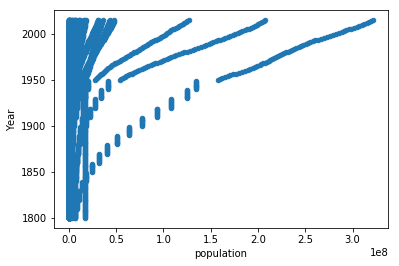

In [88]:
import matplotlib.pyplot as plt
gpmindAmerica.plot(kind='scatter', x=gpmindAmerica.columns[3], y = gpmindAmerica.columns[1])

<p><font size="2">The grap shows how the population has grown through out the years. More specifically the population had a steadly grow until around the 1970s and then we see how the population just rapidly grows over the pass decades just as we had expected to happen.
    It was easy to notice the grow in population after the 1970s but from the 1800s the population grow seem to be steady over the years except for a small part of the population that seems to grow as fas as in the 1900s. In which case some analysis of some of the data between 1800s and 1900s was a good idead to see if the same pattern occured with a smaller dataset. The grow of the 1800s seems to start around 1850.

In [ ]:
gp1800 = gpmindAmerica[gpmindAmerica["Year"] <=1899]
gp1900 = gpmindAmerica[(gpmindAmerica["Year"]<=1999) & (gpmindAmerica["Year"]>=1900)]
gp1900.head()

Text(0.5, 1.0, 'Americas Population by Country 1800s')

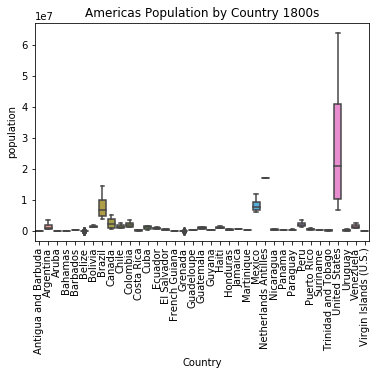

In [266]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')
 
ax18  = sns.boxplot( x=gp1800['Country'], y=gp1800['population'] )
ax18.set_xticklabels(ax18.get_xticklabels(),rotation=90)
ax18.set_title('Americas Population by Country 1800s')

Text(0.5, 1.0, 'Americas Population by Country 1900s')

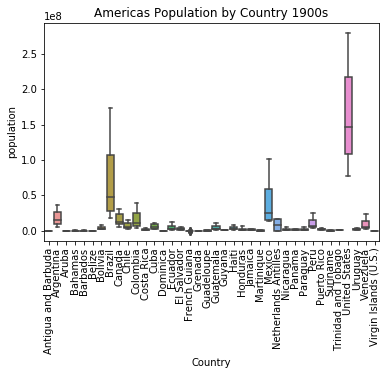

In [265]:
ax19  = sns.boxplot( x=gp1900['Country'], y=gp1900['population'] )
ax19.set_xticklabels(ax19.get_xticklabels(),rotation=90)
ax19.set_title('Americas Population by Country 1900s')

<p>By looking at the Box plot we can see how a few countries in the 1800s are the ones that marked the rapid grow for the period. During the 1900s the same countries continue this rapid grow while some others start growing at a rapidly as well which adds to the bigger grow seen during the 1900s

In [66]:
from sklearn.cluster import KMeans
import numpy as np

<p>Using cluster analysis of a few data points from 1800s and 1900s we can look at the population grow and analyze the pattern during the time period. A data point was picked from each decade of the 1800s 1900s.

In [70]:
gp1800unique = gp1800unique[["population","Year"]]
gp1900unique = gp1900unique[["population","Year"]]

In [ ]:
gp1800unique.tail(40)
gp1800unique.head(40)

In [ ]:
gp1900unique.tail(40)
gp1900unique.head(40)

In [77]:
x = np.array([[34925, 1900],
              [32119, 1910],
              [30000, 1920],
              [33647, 1930],
              [38495, 1940],
              [32632, 1960],
              [64070, 1970],
              [98423, 1980],
              [103253,1990],
              [37000, 1800],
              [37000, 1810],
              [37000, 1820],
              [37000, 1830],
              [37000, 1840],
              [38020, 1860],
              [36892, 1870],
              [34553, 1880],
              [32805, 1890]
             ])

<p> With an array from the data points selected a cluster analysis was created to see the population growth

In [78]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(x)

centrois = kmeans.cluster_centers_
labels = kmeans.labels_

print(centrois)
print(labels)

[[ 37072.375   1883.125]
 [100838.      1985.   ]]
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]


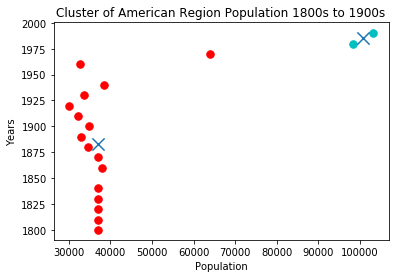

In [223]:
colors = ["r.","c."]

for i in range(len(x)):
    #print("coordinate:",x[i], "label:", labels[i])
    plt.plot(x[i][0], x[i][1], colors[labels[i]], markersize = 15)

plt.title('Cluster of American Region Population 1800s to 1900s')
plt.ylabel('Years')
plt.xlabel('Population')
plt.scatter(centrois[:, 0],centrois[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()

<p>The graph above represents the cluster analysis of the selected points, we can visualize how the population was steadly growing 
until around 1970. There is even around the end of the 1800s and beginning of 1900 a period where the population actually declines and then it takes a big jump around 1970 and from there it really starts to grow. The graphs also shows a period around 1860 where the population has a bigger grow than the rest of period. The model acurately reppresents that notion that through the years the population has been growing and even more rapidly over the past decades.
<p>A regression analysis was also ran between the datasets.

In [89]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [92]:
regr = linear_model.LinearRegression()

In [129]:
gp1800popX = np.array([[37000],
              [37000],
              [37000],
              [37000],
              [37000],
              [38020],
              [36892],
              [34553],
              [32805]
             ]);

In [130]:
 gp1800yrY = np.array([[1800],
                       [1810],
                       [1820],
                       [1830],
                       [1840],
                       [1860],
                       [1870],
                       [1880],
                       [1890]]); 

In [131]:
gp1900popX = np.array([[34925],
              [32119],
              [30000],
              [33647],
              [38495],
              [32632],
              [64070],
              [98423],
              [103253]
             ])

In [132]:
 gp1900yrY = np.array([[1900],
                       [1910],
                       [1920],
                       [1930],
                       [1940],
                       [1960],
                       [1970],
                       [1980],
                       [1990]]); 

In [213]:
regr.fit(gp1800yrY,gp1900yrY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [214]:
gp1800popYpred = regr.predict(gp1900popX)

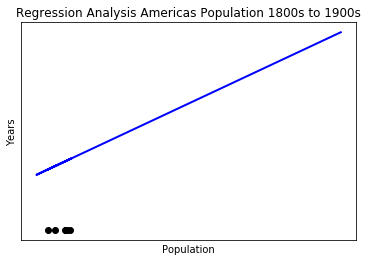

In [222]:
# Plot outputs
plt.scatter(gp1800popX, gp1800yrY, color='black')
plt.plot(gp1900popX, gp1800popYpred, color='blue', linewidth=2)

plt.xticks(())
plt.yticks(())
plt.ylabel('Years')
plt.xlabel('Population')
plt.title('Regression Analysis Americas Population 1800s to 1900s')
plt.show()

<p>The Graph shows that for the 1900s we shuold expect our population to be above and grow much more than during the 1800s.
As we expected the population of Americas has grown a lot more during the passed decades that it did in the 1800s. For the most parts the same countries are the ones that have sustained the rapid growth that even started in the 1800s and really took of in the 1900s. During the 1900s other countries become part of the rapid grow as well.
<p> After analizing the data I can confirm the question that the population of America has been growing rapidly specially over the past decades